In [ ]:
import cv2
import numpy as np

src_img = cv2.imread('../input/image.jpg')
src_gray = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)

fast_detector = cv2.FastFeatureDetector_create(500)
kpts = fast_detector.detect(src_gray, None)

src_kpts = cv2.drawKeypoints(src_img, kpts, None)
cv2.imshow('FAST detection result', src_kpts)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

x = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(x)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
y = tsne.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


# 결정트리를 이용한 멜버른 집값 예측

Decision Tree: 0.405412915944668 <br/>
Light GBM: 0.7166618912536572

## mount Google Drive and unzip zip file

In [ ]:
!ls drive/MyDrive/21_ls

'[러닝스푼즈]머신러닝_가우스킴_1회차_강의자료_v2.pdf'	  data
'[러닝스푼즈]머신러닝_가우스킴_1회차_강의자료_v2.pptx'	  input
'[러닝스푼즈]머신러닝_가우스킴_2회차_강의자료 (1).pptx'   Unit_1
'[러닝스푼즈]머신러닝_가우스킴_2회차_강의자료.pptx'	  Unit_1_v.ipynb
'[러닝스푼즈]머신러닝_가우스킴_3회차_강의자료_v2.pdf'	  Unit_2.ipynb
'[러닝스푼즈]머신러닝_가우스킴_3회차_강의자료_v2.pptx'	  Unit_3
'[러닝스푼즈]머신러닝_가우스킴_5회차_강의자료_v2.pptx'	  Unit_4
'[러닝스푼즈]머신러닝_가우스킴_6회차_강의자료.pdf'	  Unit_4_v2
'[러닝스푼즈]머신러닝_가우스킴_6회차_강의자료.pptx'	  Unit_5.ipynb
'[러닝스푼즈]머신러닝_가우스킴_7회차_강의자료.pdf'	  Unit_6.ipynb
'[러닝스푼즈]머신러닝_가우스킴_7회차_강의자료.pptx'	  Unit_7.ipynb
'[러닝스푼즈]머신러닝_가우스킴_8회차_강의자료.pdf'	  Unit_8.ipynb
'[러닝스푼즈]머신러닝_가우스킴_8회차_강의자료.pptx'


In [ ]:
# !unzip drive/MyDrive/21_ls/data/melbourne_data.zip -d drive/MyDrive/21_ls/input/

Archive:  drive/MyDrive/21_ls/data/melbourne_data.zip
replace drive/MyDrive/21_ls/input/melb_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## 데이터 불러오기, 모델 학습 및 예측

In [ ]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
melbourne_file_path = 'drive/MyDrive/21_ls/input/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
y = melbourne_data.Price
y

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64

In [ ]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
# NaN의 갯수를 범주별로 더하고, 정렬하여 어떤 것 항목에 많이 있는지 확인
melbourne_data.isna().sum().sort_values(ascending=False) 

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

In [ ]:
# 갯수로 보는 것보다 비율로 보는게 더 이해하기 쉬울 수 있으므로 전체 결측치 수의 비율로 계산
(melbourne_data.isna().sum() * 100 / melbourne_data.isna().count()).sort_values(ascending=False)

BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Car               0.456554
Suburb            0.000000
Bathroom          0.000000
Regionname        0.000000
Longtitude        0.000000
Lattitude         0.000000
Landsize          0.000000
Bedroom2          0.000000
Address           0.000000
Postcode          0.000000
Distance          0.000000
Date              0.000000
SellerG           0.000000
Method            0.000000
Price             0.000000
Type              0.000000
Rooms             0.000000
Propertycount     0.000000
dtype: float64

In [ ]:
# 결측치가 있는 클래스들에 대해서 출력
melbourne_data[['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].describe(include='all')

,BuildingArea,YearBuilt,CouncilArea,Car
count,7130.000000,8205.000000,12211,13518.000000
unique,NaN,NaN,33,NaN
top,NaN,NaN,Moreland,NaN
freq,NaN,NaN,1163,NaN
mean,151.967650,1964.684217,NaN,1.610075
std,541.014538,37.273762,NaN,0.962634
min,0.000000,1196.000000,NaN,0.000000
25%,93.000000,1940.000000,NaN,1.000000
50%,126.000000,1970.000000,NaN,2.000000
75%,174.000000,1999.000000,NaN,2.000000


In [ ]:
melbourne_data['CouncilArea'].value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

In [ ]:
melbourne_data['CouncilArea'] = melbourne_data['CouncilArea'].fillna('Moreland') # 가장 많이 등장한 값인 moreland도 채움

In [ ]:
melbourne_data['YearBuilt'] = melbourne_data['YearBuilt'].fillna(melbourne_data['YearBuilt'].median())

In [ ]:
melbourne_data['BuildingArea'] = melbourne_data['BuildingArea'].fillna(melbourne_data['BuildingArea'].mean()) # 평균

In [ ]:
melbourne_data['Car'] = melbourne_data['Car'].fillna(melbourne_data['Car'].median()) # 중간값

In [ ]:
melbourne_data.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [ ]:
categorical_features = melbourne_data.select_dtypes('object').columns
numeric_features = melbourne_data.select_dtypes(['int', 'float']).columns

print( categorical_features, len(categorical_features) )
print( numeric_features , len(numeric_features) )

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object') 8
Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object') 13


In [ ]:
for col in categorical_features:
    print("Uniq val of "+ col + " =",  len(melbourne_data[col].unique()))

Uniq val of Suburb = 314
Uniq val of Address = 13378
Uniq val of Type = 3
Uniq val of Method = 5
Uniq val of SellerG = 268
Uniq val of Date = 58
Uniq val of CouncilArea = 33
Uniq val of Regionname = 8


In [ ]:
categorical_features = categorical_features.drop('Address')
categorical_features = categorical_features.drop('SellerG')
categorical_features = categorical_features.drop('Suburb')

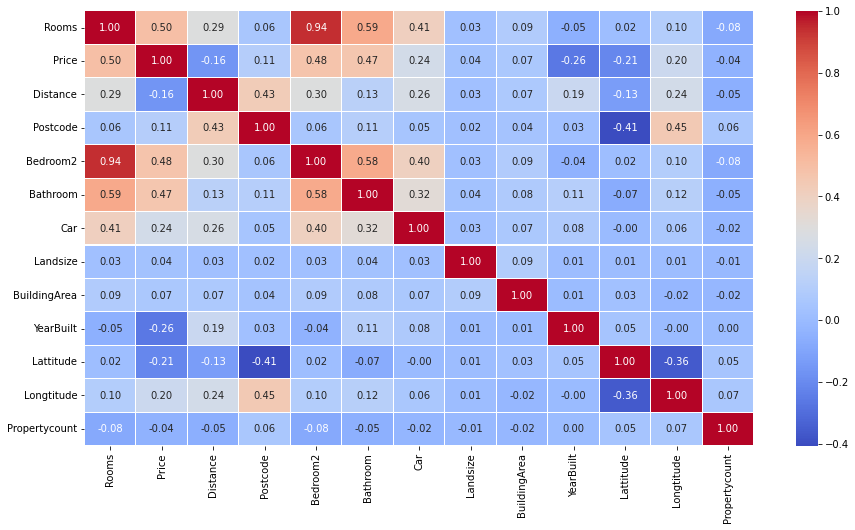

In [ ]:
corr_ = melbourne_data[numeric_features].corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr_, fmt='.2f', linewidths=.1, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
for column in categorical_features:    
    if column == 'Type':
      encoder = OneHotEncoder()
      encoder.fit(melbourne_data[column].to_numpy().reshape(-1, 1))
      df_new_feat = pd.DataFrame(encoder.transform(melbourne_data[column].values.reshape(-1,1)).toarray(), columns=['{}_{}'.format(column,i) for i in range(len(encoder.categories_[0]))])
      melbourne_data = pd.concat([melbourne_data, df_new_feat], axis=1)
      melbourne_data.drop([column], axis=1)
      categorical_features = categorical_features.drop(column)
    else:
      encoder = LabelEncoder()
      melbourne_data[column] = encoder.fit_transform(melbourne_data[column])
    

In [ ]:
melbourne_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Type_0,Type_1,Type_2,Type_0,Type_1,Type_2
0,Abbotsford,85 Turner St,2,h,1480000.0,1,Biggin,45,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1970.0,31,-37.79960,144.99840,2,4019.0,1.0,0.0,0.0,1.0,0.0,0.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,1,Biggin,47,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.0,31,-37.80790,144.99340,2,4019.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Abbotsford,5 Charles St,3,h,1465000.0,3,Biggin,48,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.0,31,-37.80930,144.99440,2,4019.0,1.0,0.0,0.0,1.0,0.0,0.0
3,Abbotsford,40 Federation La,3,h,850000.0,0,Biggin,48,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1970.0,31,-37.79690,144.99690,2,4019.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Abbotsford,55a Park St,4,h,1600000.0,4,Nelson,49,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.0,31,-37.80720,144.99410,2,4019.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,1,Barry,33,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.0,23,-37.90562,145.16761,4,7392.0,1.0,0.0,0.0,1.0,0.0,0.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,3,Williams,33,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.0,23,-37.85927,144.87904,6,6380.0,1.0,0.0,0.0,1.0,0.0,0.0
13577,Williamstown,83 Power St,3,h,1170000.0,1,Raine,33,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.0,23,-37.85274,144.88738,6,6380.0,1.0,0.0,0.0,1.0,0.0,0.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,0,Sweeney,33,6.8,3016.0,4.0,1.0,5.0,866.0,157.00000,1920.0,23,-37.85908,144.89299,6,6380.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
training_features = list(numeric_features) + list(categorical_features)
training_features.remove('Price')

In [ ]:
minMaxNorm = MinMaxScaler()
minMaxNorm.fit(melbourne_data[training_features])

MinMaxScaler()

In [ ]:
X = minMaxNorm.transform(melbourne_data[training_features]) 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
print(pca.singular_values_)

X_pca = pca.transform(X)
X_all = np.concatenate([X, X_pca], axis=1)

[0.21619506 0.18995385 0.18089625 0.16908122]
0.7561263822543465
[36.42763944 34.14539974 33.3213763  32.21482908]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.1, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12222, 20) (12222,)
(1358, 20) (1358,)


In [ ]:
melbourne_model = DecisionTreeRegressor(random_state=2021)
melbourne_model.fit(X_train, y_train)

dt_r2 = melbourne_model.score(X_test, y_test)
dt_r2

0.5363515670683969

### 바꿔보기
1. Light GBM 모델로 변경
2. 사용하는 feature 변경
3. 모델 파라미터 조정
4. Dataset split 비율 조정
5. 여러분들이 배우셨던 통계 지식 활용

## Light GBM

In [ ]:
import lightgbm

In [ ]:
train_data = lightgbm.Dataset(X_train, label=y_train) #, categorical_feature=categorical_features)
test_data = lightgbm.Dataset(X_test, label=y_test)

In [ ]:
parameters = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting': 'gbdt',
    'learning_rate': 0.05,
    'feature_fraction': 0.6,
}

In [ ]:
lgbm_model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=500,
                       early_stopping_rounds=10)

[1]	valid_0's rmse: 607685
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's rmse: 588882
[3]	valid_0's rmse: 571518
[4]	valid_0's rmse: 555669
[5]	valid_0's rmse: 539991
[6]	valid_0's rmse: 525289
[7]	valid_0's rmse: 513321
[8]	valid_0's rmse: 501424
[9]	valid_0's rmse: 489517
[10]	valid_0's rmse: 479018
[11]	valid_0's rmse: 468050
[12]	valid_0's rmse: 457359
[13]	valid_0's rmse: 448347
[14]	valid_0's rmse: 439970
[15]	valid_0's rmse: 431655
[16]	valid_0's rmse: 424200
[17]	valid_0's rmse: 416395
[18]	valid_0's rmse: 409435
[19]	valid_0's rmse: 401503
[20]	valid_0's rmse: 394954
[21]	valid_0's rmse: 389324
[22]	valid_0's rmse: 384701
[23]	valid_0's rmse: 379122
[24]	valid_0's rmse: 374366
[25]	valid_0's rmse: 369880
[26]	valid_0's rmse: 364876
[27]	valid_0's rmse: 360535
[28]	valid_0's rmse: 356629
[29]	valid_0's rmse: 353243
[30]	valid_0's rmse: 349398
[31]	valid_0's rmse: 345810
[32]	valid_0's rmse: 342704
[33]	valid_0's rmse: 339324
[34]	valid_0's rmse: 33

In [ ]:
lgbm_r2 = r2_score(lgbm_model.predict(X_test), y_test)
print(dt_r2, lgbm_r2)

0.5363515670683969 0.7862026981701075


In [ ]:
dt_mse = mean_squared_error(melbourne_model.predict(X_test), y_test, squared=False)
lgbm_mse = mean_squared_error(lgbm_model.predict(X_test), y_test, squared=False)
print(dt_mse, lgbm_mse)

426794.1232111415 263258.45809458406
